# Groupe5 - Apprentissage Artificiel

### FORDJOU KAMGANG Landry                            19M2366
### PANDJI TCHOUAKOUE Frank Manuel               19M2110
### AZESSIE NOGHIEWO Léonce                             19M2617
### EYENGA MINKONDA Laurentine Serena           19M2455

### TPE: Implémentation de KNN

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
#from levenshtein import levenshtein


iris = datasets.load_iris()
data = iris.data
labels = iris.target
for i in [0, 79, 99, 101]:
    print(f"index: {i:3}, features: {data[i]}, label: {labels[i]}")

index:   0, features: [5.1 3.5 1.4 0.2], label: 0
index:  79, features: [5.7 2.6 3.5 1. ], label: 1
index:  99, features: [5.7 2.8 4.1 1.3], label: 1
index: 101, features: [5.8 2.7 5.1 1.9], label: 2


In [2]:
# seeding is only necessary for the website
#so that the values are always equal:
# creation du jeux d'apprentissage
np.random.seed(42)
indices = np.random.permutation(len(data))
n_training_samples = 12
learn_data = data[indices[:-n_training_samples]]
learn_labels = labels[indices[:-n_training_samples]]
test_data = data[indices[-n_training_samples:]]
test_labels = labels[indices[-n_training_samples:]]
print("The first samples of our learn set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")
print("The first samples of our test set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")

The first samples of our learn set:
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1
The first samples of our test set:
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1


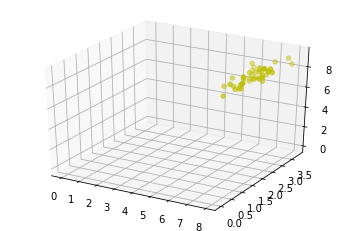

In [3]:

import matplotlib.pyplot as plt

colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
for i in range(len(learn_data)):
    if learn_labels[i] == iclass:
        X[iclass][0].append(learn_data[i][0])
        X[iclass][1].append(learn_data[i][1])
        X[iclass][2].append(sum(learn_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
      ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

In [4]:
#calcul de la distance eucludienne avec la fonction norm du module np.linalg
def distance(instance1, instance2):
    """ Calculates the Eucledian distance between two instances"""
    return np.linalg.norm(np.subtract(instance1, instance2))
print(distance([3, 5], [1, 1]))
print(distance(learn_data[3], learn_data[44]))

4.47213595499958
3.4190641994557516


In [5]:
#cette fonction retourne la liste des k voisins
def get_neighbors(training_set,labels,test_instance,k,distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The function returns a list of k 3-tuples.
    Each 3-tuples consists of (index, dist, label) where index
    is the index from the training_set, dist
    is the distance between the test_instance and the
    instance training_set[index]
    distance is a reference to a function used to calculate the
    distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k]
        return neighbors

In [6]:
#on teste la fonction avec le dataset de iris
for i in range(5):
    neighbors = get_neighbors(learn_data,
                             learn_labels,
                             test_data[i],3,
                             distance=distance)
print("Index:",i,'\n',
"Testset Data: ",test_data[i],'\n',
"Testset Label: ",test_labels[i],'\n',
"Neighbors:",neighbors,'\n')

Index: 4 
 Testset Data:  [5.6 2.8 4.9 2. ] 
 Testset Label:  2 
 Neighbors: [(array([6.1, 2.8, 4.7, 1.2]), 0.9643650760992956, 1)] 



In [7]:
#la fonction vote compte le nombre de classe al'interi
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [8]:
#on teste la fonction vote sur les donnees d'entrainnelent
for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,
                             learn_labels,
                             test_data[i],3,
                             distance=distance)
print("index: ", i,
", result of vote: ", vote(neighbors),
", label: ", test_labels[i],
", data: ", test_data[i])

index:  11 , result of vote:  1 , label:  2 , data:  [7.1 3.  5.9 2.1]


In [9]:
# la fonction vote_prob retourne le nom des classes et la probabilite de chaque classe
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
        labels, votes = zip(*class_counter.most_common())
        winner = class_counter.most_common(1)[0][0]
        votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)
for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,
                              learn_labels,
                              test_data[i],5,
                              distance=distance)
print("index: ", i,
", vote_prob: ", vote_prob(neighbors),
", label: ", test_labels[i],
", data: ", test_data[i])

index:  11 , vote_prob:  (1, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]


In [10]:
#on peut aussi utiliser le deriess harmonique pour trouver la classe a attribuer a la nouvelle valeur
def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
        labels, votes = zip(*class_counter.most_common())
        #print(labels, votes)
        winner = class_counter.most_common(1)[0][0]
        votes4winner = class_counter.most_common(1)[0][1]
        if all_results:
            total = sum(class_counter.values(), 0.0)
            for key in class_counter:
                class_counter[key] /= total
            return winner, class_counter.most_common()
        else:
            return winner, votes4winner / sum(votes)
    for i in range(n_training_samples):
        neighbors = get_neighbors(learn_data,
                                 learn_labels,
                                 test_data[i],6,
                                 distance=distance)
print("index: ", i,
", result of vote: ",
vote_harmonic_weights(neighbors,
all_results=True))

index:  11 , result of vote:  (1, [(1, 1.0)])


In [11]:
#on peut utiliser une nouvelle fonction de vote en utilsant la nouvelle distance
def vote_distance_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
        labels, votes = zip(*class_counter.most_common())
        #print(labels, votes)
        winner = class_counter.most_common(1)[0][0]
        votes4winner = class_counter.most_common(1)[0][1]
        if all_results:
            total = sum(class_counter.values(), 0.0)
            for key in class_counter:
                class_counter[key] /= total
            return winner, class_counter.most_common()
        else:
            return winner, votes4winner / sum(votes)
    for i in range(n_training_samples):
        neighbors = get_neighbors(learn_data,
                                 learn_labels,
                                 test_data[i],6,
                                 distance=distance)
print("index: ", i,
", result of vote: ",
vote_distance_weights(neighbors,
all_results=True))

index:  11 , result of vote:  (1, [(1, 1.0)])


In [12]:
# on souhaite tester les fonction ci-dessus ave un autre dataset
train_set = [(1, 2, 2),
(-3, -2, 0),
(1, 1, 3),
(-3, -3, -1),
(-3, -2, -0.5),
(0, 0.3, 0.8),
(-0.5, 0.6, 0.7),
(0, 0, 0)
]
labels = ['apple', 'banana', 'apple',
'banana', 'apple', "orange",
'orange', 'orange']
k = 2
for test_instance in [(0, 0, 0), (2, 2, 2),
                     (-3, -1, 0), (0, 1, 0.9),
                     (1, 1.5, 1.8), (0.9, 0.8, 1.6)]:
    neighbors = get_neighbors(train_set,
                             labels,
                             test_instance,
                             k,
                             distance=distance)
print("vote distance weights: ",
vote_distance_weights(neighbors))

vote distance weights:  ('apple', [('apple', 1.0)])


In [13]:
# cet exemple permet de reconnaitre les mots mal orthographies

from levenshtein import levenshtein

cities = open("data/city_names.txt").readlines()
cities = [city.strip() for city in cities]
for city in ["Freiburg", "Frieburg", "Freiborg",
            "Hamborg", "Sahrluis"]:
    neighbors = get_neighbors(cities,
                              cities,
                              city,2,
                             distance=levenshtein)
print("vote_distance_weights: ", vote_distance_weights(neighbors))

ModuleNotFoundError: No module named 'levenshtein'

In [ ]:
words = []
with open("/home/share/dict/british-english.txt") as fh:
    for line in fh:
        word = line.strip()
        words.append(word)

In [ ]:
for word in ["holpful", "kundnoss", "holpposs", "thoes", "innerstand",
            "blagrufoo", "liberdi"]:
            neighbors = get_neighbors(words,
                                    words,
                                    word,
                                    3,
                                    distance=levenshtein)
print("vote_distance_weights: ", vote_distance_weights(neighbors,
                                                         all_results=False))
print("vote_prob: ", vote_prob(neighbors))
print("vote_distance_weights: ", vote_distance_weights(neighbors))